In [26]:
import pandas as pd
dataset=pd.read_csv('zeolite_CBU_Amorphous.csv', index_col=0, header=0)
x=pd.concat([dataset.iloc[:, 0:5], dataset.iloc[:, 6:8]], axis=1)
autoscaled_x=(x-x.mean())/x.std()
display(autoscaled_x)
display(autoscaled_x.corr())
from sklearn.decomposition import PCA
pca=PCA()
pca.fit(autoscaled_x)
loading_vector=pd.DataFrame(pca.components_.T)
loading_vector.index=x.columns
loading_vector.columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7']
display(loading_vector)
print((loading_vector**2).sum())
score=pd.DataFrame(pca.transform(autoscaled_x))
score.index=x.index
score.columns=loading_vector.columns
display(score)
contribution_ratio=pd.DataFrame(pca.explained_variance_ratio_)
contribution_ratio.columns=['contribution_ratio']
display(contribution_ratio)
contribution_ratio_cumsum=contribution_ratio.cumsum()
contribution_ratio_cumsum.columns=['contribution_ratio_cumsum']
display(contribution_ratio_cumsum)
PCA1_max=score.iloc[:, 0].max()
PCA1_min=score.iloc[:, 0].min()
PCA2_max=score.iloc[:, 1].max()
PCA2_min=score.iloc[:, 1].min()
PCA3_max=score.iloc[:, 2].max()
PCA3_min=score.iloc[:, 2].min()
print(f"PCA1の最大値: {PCA1_max}")
print(f"PCA1の最小値: {PCA1_min}")
print(f"PCA2の最大値: {PCA2_max}")
print(f"PCA2の最小値: {PCA2_min}")
print(f"PCA3の最大値: {PCA3_max}")
print(f"PCA3の最小値: {PCA3_min}")

T=score.iloc[:, 0:2]
from dcekit.validation import k3nerror
k3nerror_of_pca = k3nerror(autoscaled_x, T, 3) + k3nerror(T, autoscaled_x, 3)
print(f"k3error: {k3nerror_of_pca}")

,Al2O3/SiO2,H2O/SiO2,NaOH/SiO2,KOH/SiO2,CsOH/SiO2,temperature,time
sample,,,,,,,
試料1,1.752132,0.141929,-0.554527,0.410522,-0.175661,1.051229,-0.333210
試料2,-0.015672,-0.199245,0.208620,-0.286448,-0.175661,-1.475409,0.211011
試料3,1.925703,0.285536,1.162554,-0.286448,-0.175661,-0.706432,0.211011
試料4,0.194207,-0.398399,-0.183266,-0.286448,-0.175661,-0.706432,0.211011
試料5,-0.631264,-0.378533,-0.444634,-0.286448,-0.175661,0.941375,-0.333210
...,...,...,...,...,...,...,...
試料544,-0.439245,-0.385312,-0.513317,-0.239941,-0.175661,0.392106,0.074956
試料545,-0.467483,-0.385312,-0.554527,-0.193433,-0.175661,0.392106,0.074956
試料546,-0.467483,-0.385312,-0.533922,-0.216687,-0.175661,0.392106,0.074956


,Al2O3/SiO2,H2O/SiO2,NaOH/SiO2,KOH/SiO2,CsOH/SiO2,temperature,time
Al2O3/SiO2,1.000000,0.613616,0.249292,0.594587,-0.064797,-0.254985,0.212195
H2O/SiO2,0.613616,1.000000,0.254841,0.791152,-0.086098,-0.112982,0.091751
NaOH/SiO2,0.249292,0.254841,1.000000,-0.155956,-0.040341,-0.376937,-0.022038
KOH/SiO2,0.594587,0.791152,-0.155956,1.000000,-0.042508,-0.000432,0.122834
CsOH/SiO2,-0.064797,-0.086098,-0.040341,-0.042508,1.000000,-0.174477,0.053689
temperature,-0.254985,-0.112982,-0.376937,-0.000432,-0.174477,1.000000,-0.046322
time,0.212195,0.091751,-0.022038,0.122834,0.053689,-0.046322,1.000000


,PC1,PC2,PC3,PC4,PC5,PC6,PC7
Al2O3/SiO2,0.544533,0.053112,0.008726,-0.068504,-0.077590,0.821595,-0.121882
H2O/SiO2,0.573445,-0.098034,-0.111749,0.148827,0.228228,-0.431100,-0.623681
NaOH/SiO2,0.183491,0.628379,-0.345661,-0.156663,0.551869,-0.068508,0.343792
KOH/SiO2,0.527343,-0.359434,0.087022,0.225449,-0.104519,-0.215835,0.690512
CsOH/SiO2,-0.050229,0.238198,0.728663,0.516076,0.368606,0.085711,-0.015393
temperature,-0.185891,-0.637055,-0.126587,-0.079377,0.695650,0.229132,0.029143
time,0.160646,-0.030621,0.559828,-0.790665,0.081287,-0.167357,0.008964


PC1    1.0
PC2    1.0
PC3    1.0
PC4    1.0
PC5    1.0
PC6    1.0
PC7    1.0
dtype: float64


,PC1,PC2,PC3,PC4,PC5,PC6,PC7
sample,,,,,,,
試料1,0.910097,-1.118193,-0.220779,0.169879,0.186962,1.609321,-0.178890
試料2,0.081421,1.144366,0.101989,-0.266222,-0.973153,-0.267882,-0.038300
試料3,1.448651,1.309502,-0.362326,-0.537551,0.048241,1.228999,-0.226903
試料4,-0.133351,0.438903,0.164193,-0.309884,-0.716222,0.193453,-0.051990
試料5,-1.013153,-0.804205,-0.268146,0.090066,0.310180,-0.006764,-0.010483
...,...,...,...,...,...,...,...
試料544,-0.732882,-0.515801,0.060108,-0.181975,-0.097952,-0.045576,-0.033506
試料545,-0.731295,-0.559912,0.078154,-0.163100,-0.123364,-0.075991,-0.012118
試料546,-0.739777,-0.538606,0.069008,-0.171570,-0.109562,-0.072384,-0.021091


,contribution_ratio
0,0.351663
1,0.205492
2,0.156864
3,0.131718
4,0.084935
5,0.054278
6,0.015049


,contribution_ratio_cumsum
0,0.351663
1,0.557155
2,0.714019
3,0.845737
4,0.930672
5,0.984951
6,1.000000


PCA1の最大値: 13.612873434663074
PCA1の最小値: -1.2655324137184236
PCA2の最大値: 4.9306359772981505
PCA2の最小値: -4.142175042557949
PCA3の最大値: 9.842376610254643
PCA3の最小値: -2.5055933409545164
k3error: 2.6788128505013113


# mor

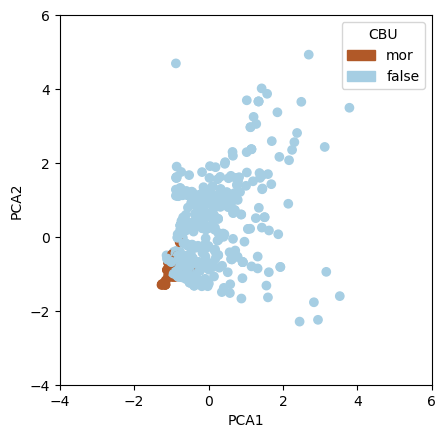

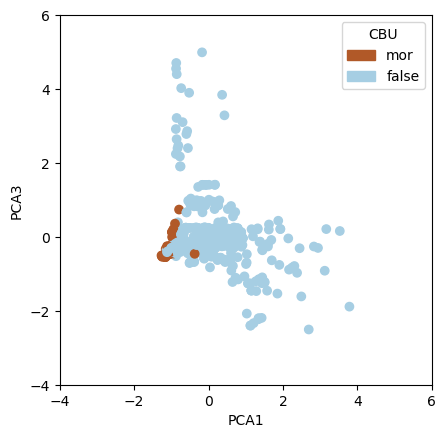

In [27]:
import matplotlib.pyplot as plt
import matplotlib.figure as figure
import numpy as np
import matplotlib.patches as mpatches

y_mor=dataset.iloc[:, 9]
CBU_mor=pd.factorize(y_mor)[0]

plt.rcParams['font.size']=10
plt.figure(figsize=figure.figaspect(1))
plt.scatter(score.iloc[:, 0], score.iloc[:, 1], c=CBU_mor, cmap=plt.get_cmap('Paired'))
unique_labels = dataset.iloc[:, 9].unique()
colors = plt.get_cmap('Paired')(np.linspace(0, 1, len(unique_labels)))
patches = [mpatches.Patch(color=colors[i], label=unique_labels[i]) for i in range(len(unique_labels))]
plt.legend(handles=patches[::-1], title="CBU")
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.xlim(-4, 6)
plt.ylim(-4, 6)
plt.show()

plt.rcParams['font.size']=10
plt.figure(figsize=figure.figaspect(1))
plt.scatter(score.iloc[:, 0], score.iloc[:, 2], c=CBU_mor, cmap=plt.get_cmap('Paired'))
unique_labels = dataset.iloc[:, 9].unique()
colors = plt.get_cmap('Paired')(np.linspace(0, 1, len(unique_labels)))
patches = [mpatches.Patch(color=colors[i], label=unique_labels[i]) for i in range(len(unique_labels))]
plt.legend(handles=patches[::-1], title="CBU")
plt.xlabel('PCA1')
plt.ylabel('PCA3')
plt.xlim(-4, 6)
plt.ylim(-4, 6)
plt.show()

# jbw

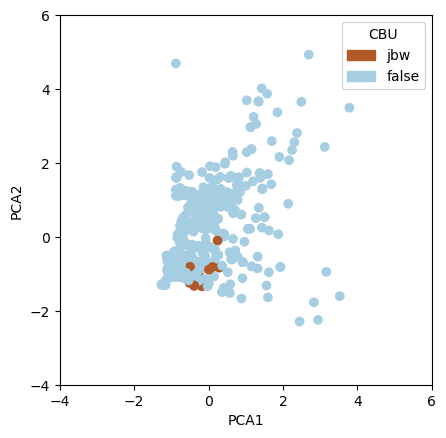

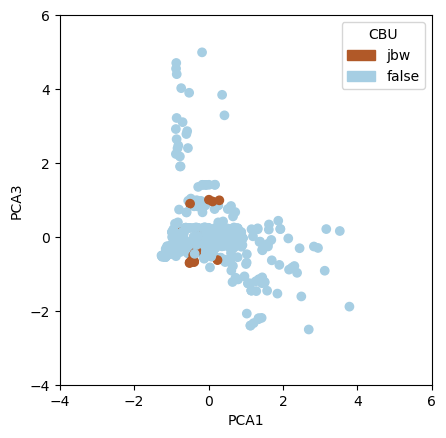

In [28]:
import matplotlib.pyplot as plt
import matplotlib.figure as figure
import numpy as np
import matplotlib.patches as mpatches

y_jbw=dataset.iloc[:, 10]
CBU_jbw=pd.factorize(y_jbw)[0]

plt.rcParams['font.size']=10
plt.figure(figsize=figure.figaspect(1))
plt.scatter(score.iloc[:, 0], score.iloc[:, 1], c=CBU_jbw, cmap=plt.get_cmap('Paired'))
unique_labels = dataset.iloc[:, 10].unique()
colors = plt.get_cmap('Paired')(np.linspace(0, 1, len(unique_labels)))
patches = [mpatches.Patch(color=colors[i], label=unique_labels[i]) for i in range(len(unique_labels))]
plt.legend(handles=patches[::-1], title="CBU")
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.xlim(-4, 6)
plt.ylim(-4, 6)
plt.show()

plt.rcParams['font.size']=10
plt.figure(figsize=figure.figaspect(1))
plt.scatter(score.iloc[:, 0], score.iloc[:, 2], c=CBU_jbw, cmap=plt.get_cmap('Paired'))
unique_labels = dataset.iloc[:, 10].unique()
colors = plt.get_cmap('Paired')(np.linspace(0, 1, len(unique_labels)))
patches = [mpatches.Patch(color=colors[i], label=unique_labels[i]) for i in range(len(unique_labels))]
plt.legend(handles=patches[::-1], title="CBU")
plt.xlabel('PCA1')
plt.ylabel('PCA3')
plt.xlim(-4, 6)
plt.ylim(-4, 6)
plt.show()

# d6r

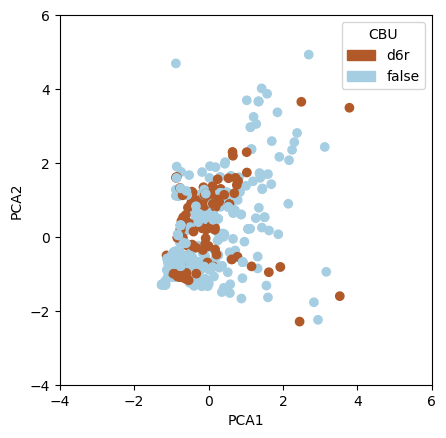

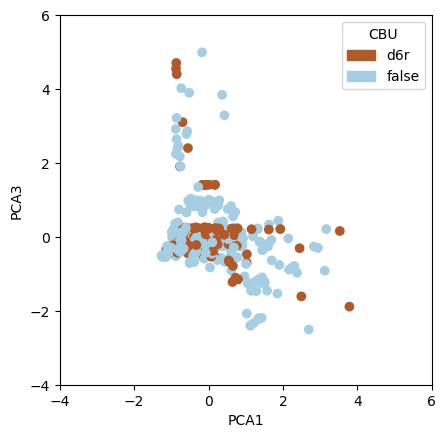

In [29]:
import matplotlib.pyplot as plt
import matplotlib.figure as figure
import numpy as np
import matplotlib.patches as mpatches

y_d6r=dataset.iloc[:, 11]
CBU_d6r=pd.factorize(y_d6r)[0]

plt.rcParams['font.size']=10
plt.figure(figsize=figure.figaspect(1))
plt.scatter(score.iloc[:, 0], score.iloc[:, 1], c=CBU_d6r, cmap=plt.get_cmap('Paired'))
unique_labels = dataset.iloc[:, 11].unique()
colors = plt.get_cmap('Paired')(np.linspace(0, 1, len(unique_labels)))
patches = [mpatches.Patch(color=colors[i], label=unique_labels[i]) for i in range(len(unique_labels))]
plt.legend(handles=patches[::-1], title="CBU")
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.xlim(-4, 6)
plt.ylim(-4, 6)
plt.show()

plt.rcParams['font.size']=10
plt.figure(figsize=figure.figaspect(1))
plt.scatter(score.iloc[:, 0], score.iloc[:, 2], c=CBU_d6r, cmap=plt.get_cmap('Paired'))
unique_labels = dataset.iloc[:, 11].unique()
colors = plt.get_cmap('Paired')(np.linspace(0, 1, len(unique_labels)))
patches = [mpatches.Patch(color=colors[i], label=unique_labels[i]) for i in range(len(unique_labels))]
plt.legend(handles=patches[::-1], title="CBU")
plt.xlabel('PCA1')
plt.ylabel('PCA3')
plt.xlim(-4, 6)
plt.ylim(-4, 6)
plt.show()

# d8r

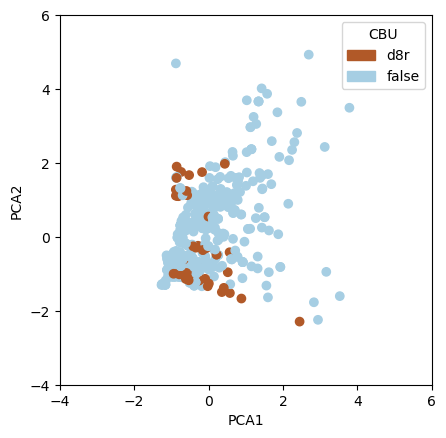

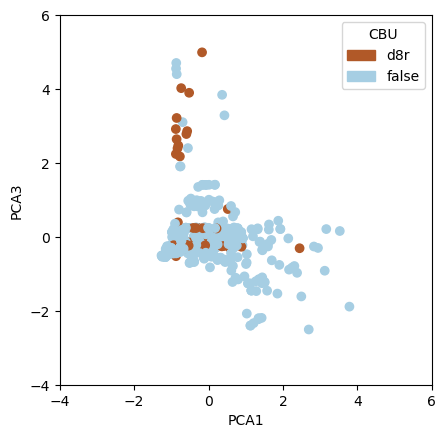

In [30]:
import matplotlib.pyplot as plt
import matplotlib.figure as figure
import numpy as np
import matplotlib.patches as mpatches

y_d8r=dataset.iloc[:, 12]
CBU_d8r=pd.factorize(y_d8r)[0]

plt.rcParams['font.size']=10
plt.figure(figsize=figure.figaspect(1))
plt.scatter(score.iloc[:, 0], score.iloc[:, 1], c=CBU_d8r, cmap=plt.get_cmap('Paired'))
unique_labels = dataset.iloc[:, 12].unique()
colors = plt.get_cmap('Paired')(np.linspace(0, 1, len(unique_labels)))
patches = [mpatches.Patch(color=colors[i], label=unique_labels[i]) for i in range(len(unique_labels))]
plt.legend(handles=patches[::-1], title="CBU")
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.xlim(-4, 6)
plt.ylim(-4, 6)
plt.show()

plt.rcParams['font.size']=10
plt.figure(figsize=figure.figaspect(1))
plt.scatter(score.iloc[:, 0], score.iloc[:, 2], c=CBU_d8r, cmap=plt.get_cmap('Paired'))
unique_labels = dataset.iloc[:, 12].unique()
colors = plt.get_cmap('Paired')(np.linspace(0, 1, len(unique_labels)))
patches = [mpatches.Patch(color=colors[i], label=unique_labels[i]) for i in range(len(unique_labels))]
plt.legend(handles=patches[::-1], title="CBU")
plt.xlabel('PCA1')
plt.ylabel('PCA3')
plt.xlim(-4, 6)
plt.ylim(-4, 6)
plt.show()

# can

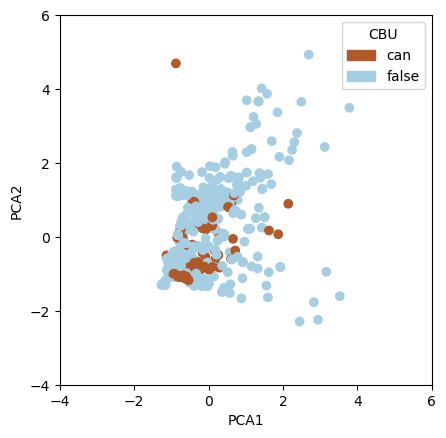

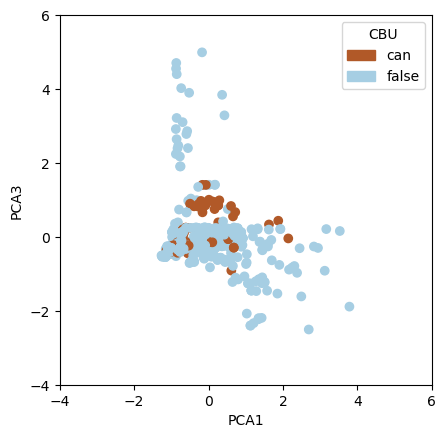

In [31]:
import matplotlib.pyplot as plt
import matplotlib.figure as figure
import numpy as np
import matplotlib.patches as mpatches

y_can=dataset.iloc[:, 13]
CBU_can=pd.factorize(y_can)[0]

plt.rcParams['font.size']=10
plt.figure(figsize=figure.figaspect(1))
plt.scatter(score.iloc[:, 0], score.iloc[:, 1], c=CBU_can, cmap=plt.get_cmap('Paired'))
unique_labels = dataset.iloc[:, 13].unique()
colors = plt.get_cmap('Paired')(np.linspace(0, 1, len(unique_labels)))
patches = [mpatches.Patch(color=colors[i], label=unique_labels[i]) for i in range(len(unique_labels))]
plt.legend(handles=patches[::-1], title="CBU")
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.xlim(-4, 6)
plt.ylim(-4, 6)
plt.show()

plt.rcParams['font.size']=10
plt.figure(figsize=figure.figaspect(1))
plt.scatter(score.iloc[:, 0], score.iloc[:, 2], c=CBU_can, cmap=plt.get_cmap('Paired'))
unique_labels = dataset.iloc[:, 13].unique()
colors = plt.get_cmap('Paired')(np.linspace(0, 1, len(unique_labels)))
patches = [mpatches.Patch(color=colors[i], label=unique_labels[i]) for i in range(len(unique_labels))]
plt.legend(handles=patches[::-1], title="CBU")
plt.xlabel('PCA1')
plt.ylabel('PCA3')
plt.xlim(-4, 6)
plt.ylim(-4, 6)
plt.show()

# sod

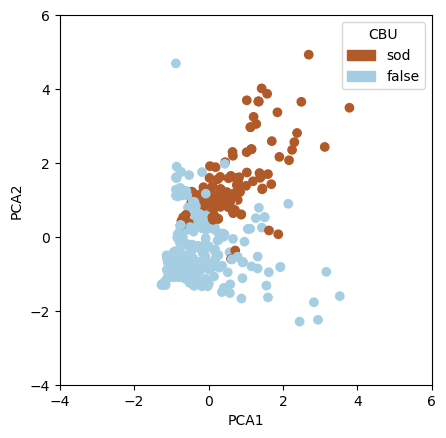

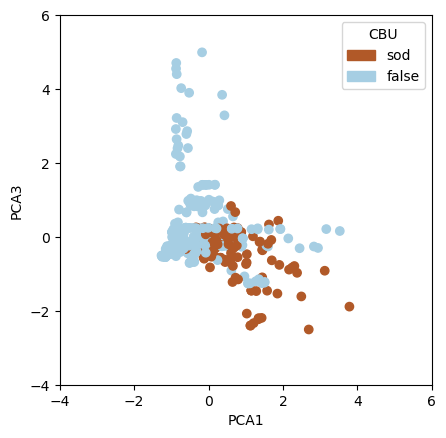

In [32]:
import matplotlib.pyplot as plt
import matplotlib.figure as figure
import numpy as np
import matplotlib.patches as mpatches

y_sod=dataset.iloc[:, 14]
CBU_sod=pd.factorize(y_sod)[0]

plt.rcParams['font.size']=10
plt.figure(figsize=figure.figaspect(1))
plt.scatter(score.iloc[:, 0], score.iloc[:, 1], c=CBU_sod, cmap=plt.get_cmap('Paired'))
unique_labels = dataset.iloc[:, 14].unique()
colors = plt.get_cmap('Paired')(np.linspace(0, 1, len(unique_labels)))
patches = [mpatches.Patch(color=colors[i], label=unique_labels[i]) for i in range(len(unique_labels))]
plt.legend(handles=patches[::-1], title="CBU")
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.xlim(-4, 6)
plt.ylim(-4, 6)
plt.show()

plt.rcParams['font.size']=10
plt.figure(figsize=figure.figaspect(1))
plt.scatter(score.iloc[:, 0], score.iloc[:, 2], c=CBU_sod, cmap=plt.get_cmap('Paired'))
unique_labels = dataset.iloc[:, 14].unique()
colors = plt.get_cmap('Paired')(np.linspace(0, 1, len(unique_labels)))
patches = [mpatches.Patch(color=colors[i], label=unique_labels[i]) for i in range(len(unique_labels))]
plt.legend(handles=patches[::-1], title="CBU")
plt.xlabel('PCA1')
plt.ylabel('PCA3')
plt.xlim(-4, 6)
plt.ylim(-4, 6)
plt.show()

# lta

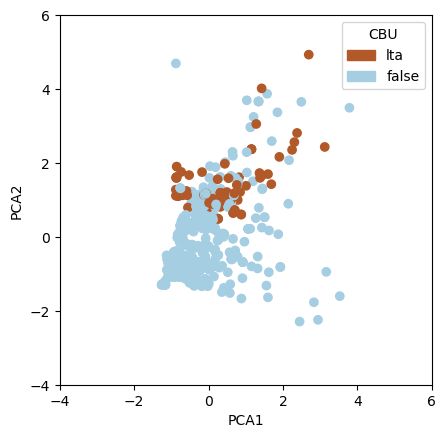

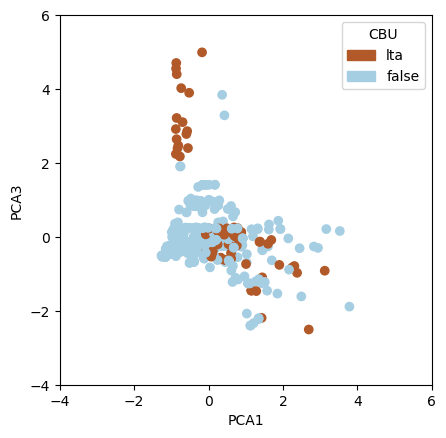

In [33]:
import matplotlib.pyplot as plt
import matplotlib.figure as figure
import numpy as np
import matplotlib.patches as mpatches

y_lta=dataset.iloc[:, 15]
CBU_lta=pd.factorize(y_lta)[0]

plt.rcParams['font.size']=10
plt.figure(figsize=figure.figaspect(1))
plt.scatter(score.iloc[:, 0], score.iloc[:, 1], c=CBU_lta, cmap=plt.get_cmap('Paired'))
unique_labels = dataset.iloc[:, 15].unique()
colors = plt.get_cmap('Paired')(np.linspace(0, 1, len(unique_labels)))
patches = [mpatches.Patch(color=colors[i], label=unique_labels[i]) for i in range(len(unique_labels))]
plt.legend(handles=patches[::-1], title="CBU")
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.xlim(-4, 6)
plt.ylim(-4, 6)
plt.show()

plt.rcParams['font.size']=10
plt.figure(figsize=figure.figaspect(1))
plt.scatter(score.iloc[:, 0], score.iloc[:, 2], c=CBU_lta, cmap=plt.get_cmap('Paired'))
unique_labels = dataset.iloc[:, 15].unique()
colors = plt.get_cmap('Paired')(np.linspace(0, 1, len(unique_labels)))
patches = [mpatches.Patch(color=colors[i], label=unique_labels[i]) for i in range(len(unique_labels))]
plt.legend(handles=patches[::-1], title="CBU")
plt.xlabel('PCA1')
plt.ylabel('PCA3')
plt.xlim(-4, 6)
plt.ylim(-4, 6)
plt.show()

# 4

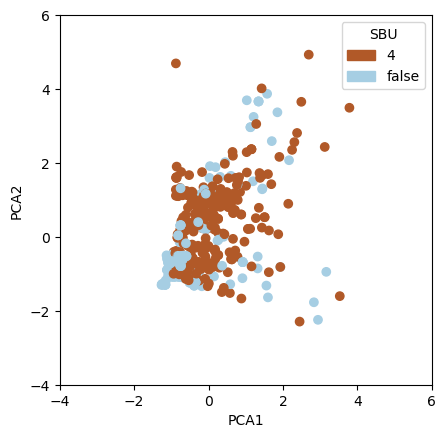

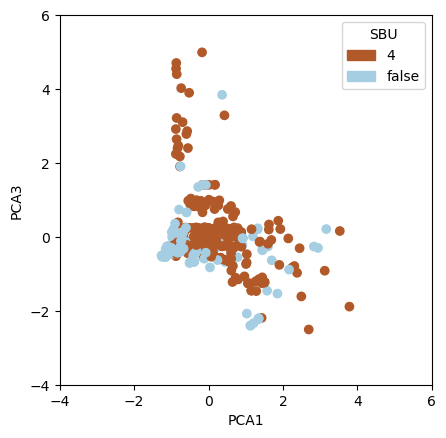

In [34]:
import matplotlib.pyplot as plt
import matplotlib.figure as figure
import numpy as np
import matplotlib.patches as mpatches

y_4=dataset.iloc[:, 16]
SBU_4=pd.factorize(y_4)[0]

plt.rcParams['font.size']=10
plt.figure(figsize=figure.figaspect(1))
plt.scatter(score.iloc[:, 0], score.iloc[:, 1], c=SBU_4, cmap=plt.get_cmap('Paired'))
unique_labels = dataset.iloc[:, 16].unique()
colors = plt.get_cmap('Paired')(np.linspace(0, 1, len(unique_labels)))
patches = [mpatches.Patch(color=colors[i], label=unique_labels[i]) for i in range(len(unique_labels))]
plt.legend(handles=patches[::-1], title="SBU")
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.xlim(-4, 6)
plt.ylim(-4, 6)
plt.show()

plt.rcParams['font.size']=10
plt.figure(figsize=figure.figaspect(1))
plt.scatter(score.iloc[:, 0], score.iloc[:, 2], c=SBU_4, cmap=plt.get_cmap('Paired'))
unique_labels = dataset.iloc[:, 16].unique()
colors = plt.get_cmap('Paired')(np.linspace(0, 1, len(unique_labels)))
patches = [mpatches.Patch(color=colors[i], label=unique_labels[i]) for i in range(len(unique_labels))]
plt.legend(handles=patches[::-1], title="SBU")
plt.xlabel('PCA1')
plt.ylabel('PCA3')
plt.xlim(-4, 6)
plt.ylim(-4, 6)
plt.show()

# 6

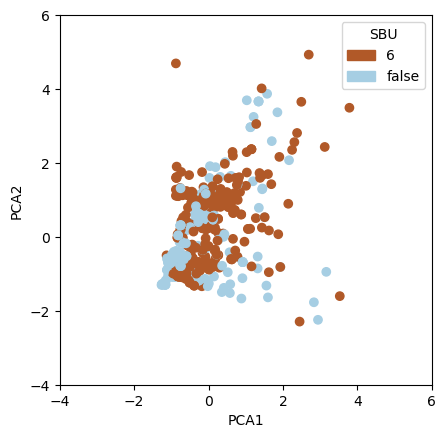

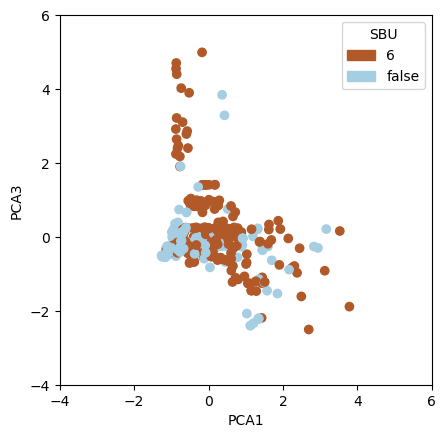

In [35]:
import matplotlib.pyplot as plt
import matplotlib.figure as figure
import numpy as np
import matplotlib.patches as mpatches

y_6=dataset.iloc[:, 17]
SBU_6=pd.factorize(y_6)[0]

plt.rcParams['font.size']=10
plt.figure(figsize=figure.figaspect(1))
plt.scatter(score.iloc[:, 0], score.iloc[:, 1], c=SBU_6, cmap=plt.get_cmap('Paired'))
unique_labels = dataset.iloc[:, 17].unique()
colors = plt.get_cmap('Paired')(np.linspace(0, 1, len(unique_labels)))
patches = [mpatches.Patch(color=colors[i], label=unique_labels[i]) for i in range(len(unique_labels))]
plt.legend(handles=patches[::-1], title="SBU")
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.xlim(-4, 6)
plt.ylim(-4, 6)
plt.show()

plt.rcParams['font.size']=10
plt.figure(figsize=figure.figaspect(1))
plt.scatter(score.iloc[:, 0], score.iloc[:, 2], c=SBU_6, cmap=plt.get_cmap('Paired'))
unique_labels = dataset.iloc[:, 17].unique()
colors = plt.get_cmap('Paired')(np.linspace(0, 1, len(unique_labels)))
patches = [mpatches.Patch(color=colors[i], label=unique_labels[i]) for i in range(len(unique_labels))]
plt.legend(handles=patches[::-1], title="SBU")
plt.xlabel('PCA1')
plt.ylabel('PCA3')
plt.xlim(-4, 6)
plt.ylim(-4, 6)
plt.show()

# 8

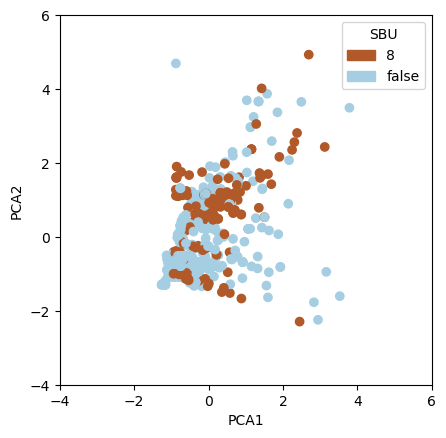

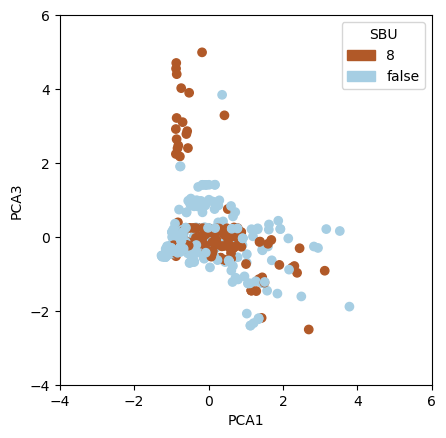

In [36]:
import matplotlib.pyplot as plt
import matplotlib.figure as figure
import numpy as np
import matplotlib.patches as mpatches

y_8=dataset.iloc[:, 18]
SBU_8=pd.factorize(y_8)[0]

plt.rcParams['font.size']=10
plt.figure(figsize=figure.figaspect(1))
plt.scatter(score.iloc[:, 0], score.iloc[:, 1], c=SBU_8, cmap=plt.get_cmap('Paired'))
unique_labels = dataset.iloc[:, 18].unique()
colors = plt.get_cmap('Paired')(np.linspace(0, 1, len(unique_labels)))
patches = [mpatches.Patch(color=colors[i], label=unique_labels[i]) for i in range(len(unique_labels))]
plt.legend(handles=patches[::-1], title="SBU")
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.xlim(-4, 6)
plt.ylim(-4, 6)
plt.show()

plt.rcParams['font.size']=10
plt.figure(figsize=figure.figaspect(1))
plt.scatter(score.iloc[:, 0], score.iloc[:, 2], c=SBU_8, cmap=plt.get_cmap('Paired'))
unique_labels = dataset.iloc[:, 18].unique()
colors = plt.get_cmap('Paired')(np.linspace(0, 1, len(unique_labels)))
patches = [mpatches.Patch(color=colors[i], label=unique_labels[i]) for i in range(len(unique_labels))]
plt.legend(handles=patches[::-1], title="SBU")
plt.xlabel('PCA1')
plt.ylabel('PCA3')
plt.xlim(-4, 6)
plt.ylim(-4, 6)
plt.show()

# 5-1

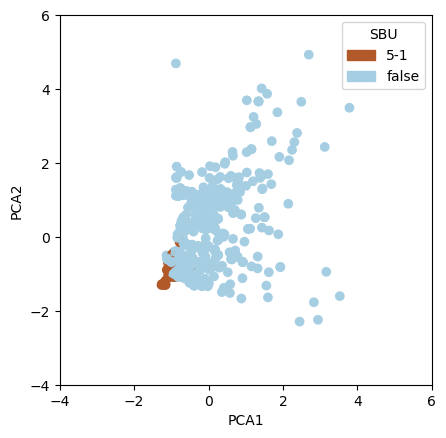

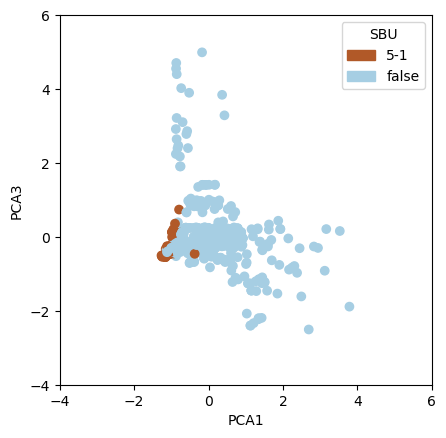

In [37]:
import matplotlib.pyplot as plt
import matplotlib.figure as figure
import numpy as np
import matplotlib.patches as mpatches

y_5_1=dataset.iloc[:, 19]
SBU_5_1=pd.factorize(y_5_1)[0]

plt.rcParams['font.size']=10
plt.figure(figsize=figure.figaspect(1))
plt.scatter(score.iloc[:, 0], score.iloc[:, 1], c=SBU_5_1, cmap=plt.get_cmap('Paired'))
unique_labels = dataset.iloc[:, 19].unique()
colors = plt.get_cmap('Paired')(np.linspace(0, 1, len(unique_labels)))
patches = [mpatches.Patch(color=colors[i], label=unique_labels[i]) for i in range(len(unique_labels))]
plt.legend(handles=patches[::-1], title="SBU")
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.xlim(-4, 6)
plt.ylim(-4, 6)
plt.show()

plt.rcParams['font.size']=10
plt.figure(figsize=figure.figaspect(1))
plt.scatter(score.iloc[:, 0], score.iloc[:, 2], c=SBU_5_1, cmap=plt.get_cmap('Paired'))
unique_labels = dataset.iloc[:, 19].unique()
colors = plt.get_cmap('Paired')(np.linspace(0, 1, len(unique_labels)))
patches = [mpatches.Patch(color=colors[i], label=unique_labels[i]) for i in range(len(unique_labels))]
plt.legend(handles=patches[::-1], title="SBU")
plt.xlabel('PCA1')
plt.ylabel('PCA3')
plt.xlim(-4, 6)
plt.ylim(-4, 6)
plt.show()

# 4-2

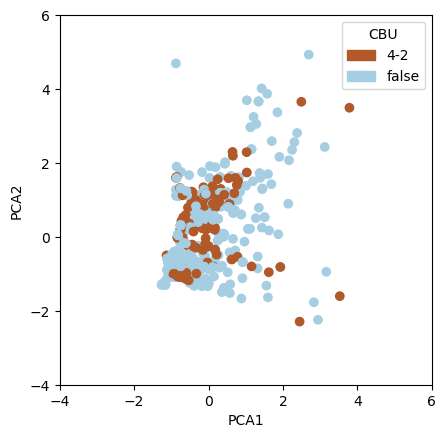

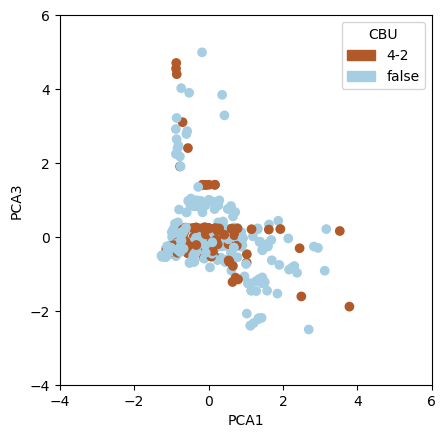

In [38]:
import matplotlib.pyplot as plt
import matplotlib.figure as figure
import numpy as np
import matplotlib.patches as mpatches

y_4_2=dataset.iloc[:, 20]
SBU_4_2=pd.factorize(y_4_2)[0]

plt.rcParams['font.size']=10
plt.figure(figsize=figure.figaspect(1))
plt.scatter(score.iloc[:, 0], score.iloc[:, 1], c=SBU_4_2, cmap=plt.get_cmap('Paired'))
unique_labels = dataset.iloc[:, 20].unique()
colors = plt.get_cmap('Paired')(np.linspace(0, 1, len(unique_labels)))
patches = [mpatches.Patch(color=colors[i], label=unique_labels[i]) for i in range(len(unique_labels))]
plt.legend(handles=patches[::-1], title="CBU")
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.xlim(-4, 6)
plt.ylim(-4, 6)
plt.show()

plt.rcParams['font.size']=10
plt.figure(figsize=figure.figaspect(1))
plt.scatter(score.iloc[:, 0], score.iloc[:, 2], c=SBU_4_2, cmap=plt.get_cmap('Paired'))
unique_labels = dataset.iloc[:, 20].unique()
colors = plt.get_cmap('Paired')(np.linspace(0, 1, len(unique_labels)))
patches = [mpatches.Patch(color=colors[i], label=unique_labels[i]) for i in range(len(unique_labels))]
plt.legend(handles=patches[::-1], title="CBU")
plt.xlabel('PCA1')
plt.ylabel('PCA3')
plt.xlim(-4, 6)
plt.ylim(-4, 6)
plt.show()

# 6-2

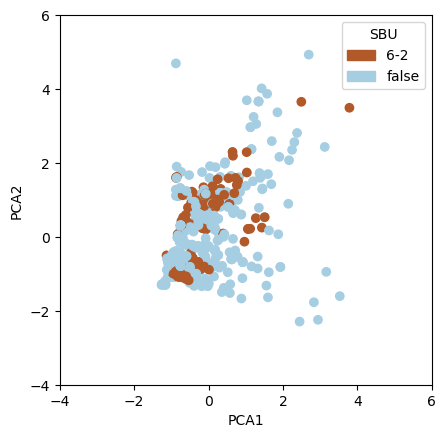

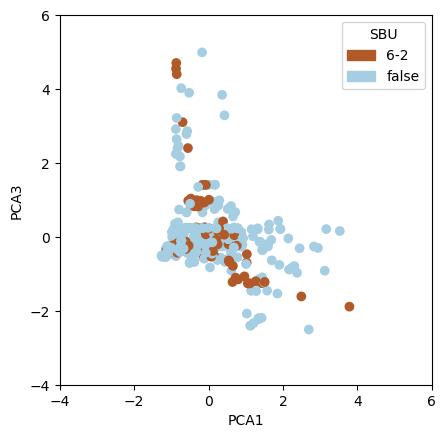

In [39]:
import matplotlib.pyplot as plt
import matplotlib.figure as figure
import numpy as np
import matplotlib.patches as mpatches

y_6_2=dataset.iloc[:, 21]
SBU_6_2=pd.factorize(y_6_2)[0]

plt.rcParams['font.size']=10
plt.figure(figsize=figure.figaspect(1))
plt.scatter(score.iloc[:, 0], score.iloc[:, 1], c=SBU_6_2, cmap=plt.get_cmap('Paired'))
unique_labels = dataset.iloc[:, 21].unique()
colors = plt.get_cmap('Paired')(np.linspace(0, 1, len(unique_labels)))
patches = [mpatches.Patch(color=colors[i], label=unique_labels[i]) for i in range(len(unique_labels))]
plt.legend(handles=patches[::-1], title="SBU")
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.xlim(-4, 6)
plt.ylim(-4, 6)
plt.show()

plt.rcParams['font.size']=10
plt.figure(figsize=figure.figaspect(1))
plt.scatter(score.iloc[:, 0], score.iloc[:, 2], c=SBU_6_2, cmap=plt.get_cmap('Paired'))
unique_labels = dataset.iloc[:, 21].unique()
colors = plt.get_cmap('Paired')(np.linspace(0, 1, len(unique_labels)))
patches = [mpatches.Patch(color=colors[i], label=unique_labels[i]) for i in range(len(unique_labels))]
plt.legend(handles=patches[::-1], title="SBU")
plt.xlabel('PCA1')
plt.ylabel('PCA3')
plt.xlim(-4, 6)
plt.ylim(-4, 6)
plt.show()

# Amorphous

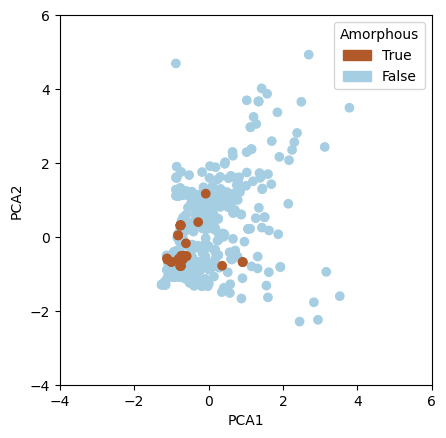

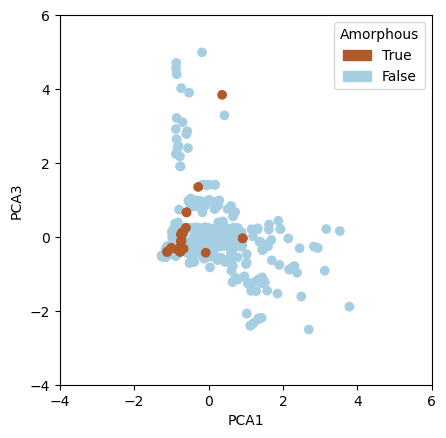

In [40]:
import matplotlib.pyplot as plt
import matplotlib.figure as figure
import numpy as np
import matplotlib.patches as mpatches

y_Amor=dataset.iloc[:, 22]
Amor=pd.factorize(y_Amor)[0]

plt.rcParams['font.size']=10
plt.figure(figsize=figure.figaspect(1))
plt.scatter(score.iloc[:, 0], score.iloc[:, 1], c=Amor, cmap=plt.get_cmap('Paired'))
unique_labels = dataset.iloc[:, 22].unique()
colors = plt.get_cmap('Paired')(np.linspace(0, 1, len(unique_labels)))
patches = [mpatches.Patch(color=colors[i], label=unique_labels[i]) for i in range(len(unique_labels))]
plt.legend(handles=patches[::-1], title="Amorphous")
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.xlim(-4, 6)
plt.ylim(-4, 6)
plt.show()

plt.rcParams['font.size']=10
plt.figure(figsize=figure.figaspect(1))
plt.scatter(score.iloc[:, 0], score.iloc[:, 2], c=Amor, cmap=plt.get_cmap('Paired'))
unique_labels = dataset.iloc[:, 22].unique()
colors = plt.get_cmap('Paired')(np.linspace(0, 1, len(unique_labels)))
patches = [mpatches.Patch(color=colors[i], label=unique_labels[i]) for i in range(len(unique_labels))]
plt.legend(handles=patches[::-1], title="Amorphous")
plt.xlabel('PCA1')
plt.ylabel('PCA3')
plt.xlim(-4, 6)
plt.ylim(-4, 6)
plt.show()